In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
sns.set_style('darkgrid')


## Data Preperation

In [5]:
combined = pd.read_csv('merged.csv')
combined = pd.get_dummies(combined, drop_first=True)
for n in [1,2,3,4,5,6,8,9]:
    name = 'WT0' + str(n)
    combined[name] = combined[name].astype('int')
combined = combined.replace(np.nan, 0)
X   = combined[['AWND', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN','WT01','WT02','WT03','WT04','WT05',
                'WT06','WT08','WT09']] 
y   = combined['DEPARTURE_DELAY'] 

X_train, X_test, y_train, y_test = train_test_split(X,              
                                                    y,              
                                                    test_size=0.3,  
                                                    random_state=7 
                                                   )

## Decision Tree Model

In [6]:
dt = DecisionTreeRegressor(random_state=7)
dt.fit(X_train, y_train)
y_pred   = dt.predict(X_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 245.92


## Nearest Neighbots Model

In [8]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 41) 

knn.fit(X_train, y_train)
y_pred   = knn.predict(X_test)

In [9]:
print('The accuracy of the model is: {}'.format(knn.score(X_test, y_test)))

The accuracy of the model is: 0.11


## Check k value

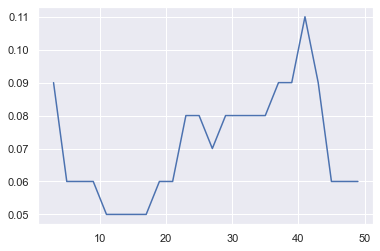

In [10]:
predictions = {}

for k in range(3, 50, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.show()

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
print(r_value)

-0.08719756968394514
